In [ ]:
### Check which GPU is in use

!nvidia-smi

Fri Nov  6 14:05:28 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    29W /  70W |    511MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow-gpu

In [ ]:
### Installing tensorflow and checking the version

import tensorflow as tf
print(tf.__version__)

2.3.1


In [ ]:
### Importing all necessaries libraries

from tensorflow.keras.layers import Dense,Flatten,Input,Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
from glob import glob

In [ ]:
### Resizing all images

IMAGE_SIZE=[224,224]

### Read the data from the drive

train_path='/content/drive/My Drive/Datasets/training_set'
test_path='/content/drive/My Drive/Datasets/test_set'

In [ ]:
resnet=ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [ ]:
for layer in resnet.layers:
  layer.trainable=False

In [ ]:
folders=glob('/content/drive/My Drive/Datasets/training_set/*')

In [ ]:
folders

['/content/drive/My Drive/Datasets/training_set/dogs',
 '/content/drive/My Drive/Datasets/training_set/cats']

In [ ]:
x=Flatten()(resnet.output)

In [ ]:
prediction=Dense(len(folders),activation='softmax')(x)

In [ ]:
model=Model(inputs=resnet.input,outputs=prediction)

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True
                                  )
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/My Drive/Datasets/training_set',
                                               target_size=(224,224),
                                               batch_size=16,
                                               class_mode='categorical')

Found 8000 images belonging to 2 classes.


In [ ]:
test_set=test_datagen.flow_from_directory('/content/drive/My Drive/Datasets/test_set',
                                               target_size=(224,224),
                                               batch_size=16,
                                               class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [ ]:
r=model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
500/500 [==============================] - 4248s 8s/step - loss: 1.1551 - accuracy: 0.5811 - val_loss: 1.3917 - val_accuracy: 0.5155
Epoch 2/20
500/500 [==============================] - 119s 239ms/step - loss: 0.8679 - accuracy: 0.6224 - val_loss: 1.1119 - val_accuracy: 0.5315
Epoch 3/20
500/500 [==============================] - 119s 239ms/step - loss: 0.8254 - accuracy: 0.6379 - val_loss: 0.6897 - val_accuracy: 0.6835
Epoch 4/20
500/500 [==============================] - 119s 237ms/step - loss: 0.8565 - accuracy: 0.6572 - val_loss: 0.6712 - val_accuracy: 0.7095
Epoch 5/20
500/500 [==============================] - 119s 239ms/step - loss: 0.9099 - accuracy: 0.6491 - val_loss: 0.7667 - val_accuracy: 0.6880
Epoch 6/20
500/500 [==============================] - 119s 238ms/step - loss: 0.9349 - accuracy: 0.6618 - val_loss: 0.7478 - val_accuracy: 0.7360
Epoch 7/20
500/500 [==============================

In [ ]:
import matplotlib.pyplot as plt

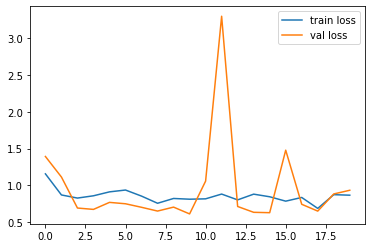

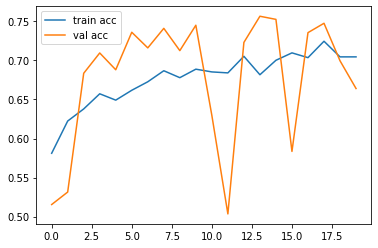

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('CatDogResnet50.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[6.9790936e-01, 3.0209062e-01],
       [5.5608757e-02, 9.4439125e-01],
       [3.7863553e-01, 6.2136447e-01],
       ...,
       [2.9193060e-04, 9.9970800e-01],
       [9.8345494e-01, 1.6545035e-02],
       [5.1280592e-02, 9.4871938e-01]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 1, 1, ..., 1, 0, 1])